### Week 5
### DSC 650
### Abed Tabbalat

In [1]:
# Mounting drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment05')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment05


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import reuters

## Importing Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
# Get the word index for the Reuters dataset
word_index = reuters.get_word_index()

# Create a dictionary mapping integers to their corresponding words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Convert the first newswire in the training set from integer-encoded back to words
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [5]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Data Prep

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

# Vectorize the training and testing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# Convert the training labels to one-hot encoded vectors
one_hot_train_labels = to_categorical(train_labels)

# Convert the testing labels to one-hot encoded vectors
one_hot_test_labels = to_categorical(test_labels)


## Model

In [8]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compile the model using RMSprop optimizer, categorical crossentropy loss function, and accuracy metric
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Split the training data into a validation set and a partial training set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Train the model using the partial training set and validate using the validation set
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 121ms/step - loss: 2.6809 - accuracy: 0.4994 - val_loss: 1.7552 - val_accuracy: 0.6010
Epoch 2/20
16/16 [==============================] - 1s 63ms/step - loss: 1.4713 - accuracy: 0.6880 - val_loss: 1.3348 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1422 - accuracy: 0.7514 - val_loss: 1.1705 - val_accuracy: 0.7400
Epoch 4/20
16/16 [==============================] - 1s 59ms/step - loss: 0.9394 - accuracy: 0.8003 - val_loss: 1.0827 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7857 - accuracy: 0.8330 - val_loss: 0.9955 - val_accuracy: 0.7830
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6626 - accuracy: 0.8568 - val_loss: 0.9419 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5499 - accuracy: 0.8814 - val_loss: 0.9339 - val_accuracy: 0.7910
Epoch 8/20
1

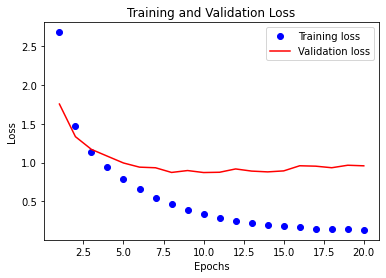

In [10]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

# Plot the training loss in blue dots and the validation loss in solid blue line
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

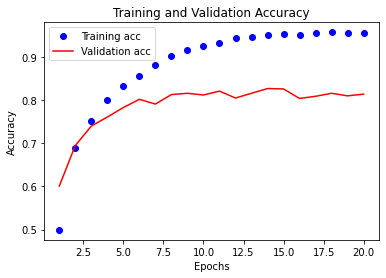

In [11]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)

# Plot the training accuracy in blue dots and the validation accuracy in solid red line
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# define sequential model
model = models.Sequential()

# add two hidden layers with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))

# add output layer with 46 units and softmax activation
model.add(layers.Dense(46, activation='softmax'))

# compile model with 'rmsprop' optimizer, 'categorical_crossentropy' loss function, and accuracy metric
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train model on partial training data and validation data, for 9 epochs with batch size of 512
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# evaluate model performance on test data
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 66ms/step - loss: 2.8593 - accuracy: 0.4230 - val_loss: 1.9469 - val_accuracy: 0.5770
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.6115 - accuracy: 0.6590 - val_loss: 1.4088 - val_accuracy: 0.6890
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.2176 - accuracy: 0.7432 - val_loss: 1.2190 - val_accuracy: 0.7450
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.9992 - accuracy: 0.7876 - val_loss: 1.0939 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 85ms/step - loss: 0.8357 - accuracy: 0.8198 - val_loss: 1.0179 - val_accuracy: 0.7770
Epoch 6/9
16/16 [==============================] - 1s 85ms/step - loss: 0.7067 - accuracy: 0.8489 - val_loss: 0.9610 - val_accuracy: 0.7890
Epoch 7/9
16/16 [==============================] - 1s 89ms/step - loss: 0.5971 - accuracy: 0.8726 - val_loss: 0.9198 - val_accuracy: 0.8040
Epoch 8/9
16/16 [===

In [13]:
results

[0.9458596110343933, 0.7831701040267944]

In [14]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 6ms/step
